In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np # linear algebra
from sklearn.model_selection import train_test_split
import matplotlib.cm as cm


In [2]:
train_file = "/home/yaoling/Desktop/githubProject/tensorflow-mnist-cnn/kaggleData/train.csv"
test_file = "/home/yaoling/Desktop/githubProject/tensorflow-mnist-cnn/kaggleData/test.csv"
output_file = "/home/yaoling/Desktop/githubProject/tensorflow-mnist-cnn/kaggleData/submission.csv"

In [3]:
def dense_to_one_hot(labels_dense, num_calsses):
    num_labels = labels_dense.shape[0]
    index_offset = np.arange(num_labels) * num_calsses
    labels_one_hot = np.zeros((num_labels, num_calsses))
    #flat返回的是一个迭代器
    labels_one_hot.flat[index_offset + labels_dense.ravel()] = 1
    return labels_one_hot


In [4]:
train_dataset = pd.read_csv(train_file)
print(train_dataset.shape)


(42000, 785)


In [5]:
Y_train_all = train_dataset["label"].values.ravel()
Y_train_all = dense_to_one_hot(Y_train_all, 10)
print(Y_train_all.shape)

# Drop the label colum in train dataset
X_train_all = train_dataset.drop(labels="label", axis=1).values
print("图片大小为：", str(X_train_all.shape[1]) + " pixels")

X_train_all = np.multiply(X_train_all, 1.0 / 255.0)

print("图片长度和高度为： " + str(X_train_all.shape[1]))


(42000, 10)
图片大小为： 784 pixels
图片长度和高度为： 784


In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train_all, Y_train_all, test_size=0.2)
print("X_train shape", X_train.shape)
print("Y_train shape", Y_train.shape)
print("X_test shape", X_test.shape)
print("Y_test shape", Y_test.shape)

X_train shape (33600, 784)
Y_train shape (33600, 10)
X_test shape (8400, 784)
Y_test shape (8400, 10)


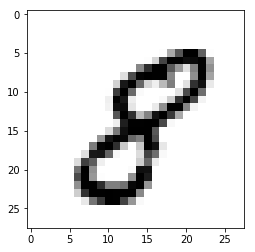

In [7]:
# display image
def display(img):
    # (784) => (28,28)
    one_image = img.reshape(28,28)
    plt.axis('on')
    plt.imshow(one_image, cmap=cm.binary)

# output image     
display(X_train[2])  

In [8]:

def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1, name='Weights')
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape, name='Bias')
    return tf.Variable(initial)

# 定义卷积和池化函数,两边两个值默认为1，中间两个1代表分别从x方向以及y方向的步长
def conv2d(input, filter):
    return tf.nn.conv2d(input, filter, strides=[1,1,1,1], padding='SAME')

def max_pooling(input):
    return tf.nn.max_pool(input, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')



In [9]:

x = tf.placeholder("float", [None, 784])
y_ = tf.placeholder("float", [None,10])

In [10]:
keep_prob = tf.placeholder(tf.float32)

X1 = tf.reshape(x, [-1, 28, 28, 1])
w_conv1 = weight_variable([5,5,1,32]) #定义滤波器
b_conv1 = bias_variable([32])   #每个滤波器对应一个bias
h_conv1 = tf.nn.relu(conv2d(X1, w_conv1) + b_conv1)
h_pool1 = max_pooling(h_conv1)

h_pool2_flat = tf.reshape(h_pool1, [-1, 14*14*32])

#----------------------------fc layer------------------------
w_fc2 = weight_variable([14*14*32,10])
b_fc2 = bias_variable([10])
with tf.name_scope("Prediction_softmax"):
    prediction = tf.nn.softmax(tf.matmul(h_pool2_flat, w_fc2) + b_fc2, name='prediction')

    

In [11]:
#(小处理)将logits乘以1赋值给logits_eval，定义name，方便在后续调用模型时通过tensor名字调用输出tensor
b = tf.constant(value=1,dtype=tf.float32)
logits_eval = tf.multiply(prediction,b,name='logits_eval')

In [12]:
with tf.name_scope("Accuracy"):
    with tf.name_scope("Correct_Prediction"):
        # 完成训练后，对模型的准确率进行验证
        correct_prediction = tf.equal(tf.argmax(prediction, 1), tf.argmax(y_, 1))
    with tf.name_scope("accuracy"):
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


In [13]:
with tf.name_scope("Loss"):
    cross_entroy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=prediction))

with tf.name_scope("TrainStep_AdamOptimizer"):
    train_step = tf.train.AdamOptimizer(learning_rate=(0.01)).minimize(cross_entroy)



Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [ ]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
batch_size = 128
n_batch = len(X_train) // batch_size
for i in range(40):
    for batch in range(n_batch):
        batch_x = X_train[batch*batch_size:(batch+1)*batch_size]
        batch_y = Y_train[batch*batch_size:(batch+1)*batch_size]
#         train on batch
        sess.run(train_step,feed_dict
                 ={x: batch_x, y_: batch_y, keep_prob:0.5})
#     accuracy_n2 = sess.run(accuracy, feed_dict={x:X_train, y_:Y_train})
    accuracy_n = sess.run(accuracy, feed_dict={x:X_test, y_:Y_test})
#     print("第"+str(i+1)+"轮，训练集准确度为：" + str(accuracy_n2))
    print("第"+str(i+1)+"轮，测试集准确度为：" + str(accuracy_n))
    print("----------------------")


第1轮，测试集准确度为：0.39809525
----------------------
第2轮，测试集准确度为：0.78761905
----------------------
第3轮，测试集准确度为：0.79011905
----------------------
第4轮，测试集准确度为：0.7897619
----------------------
第5轮，测试集准确度为：0.79214287
----------------------
第6轮，测试集准确度为：0.7942857
----------------------


In [ ]:
test_dataset = pd.read_csv(test_file)
test_dataset = np.multiply(test_dataset, 1.0 / 255.0)
print(test_dataset.shape)
predict = tf.argmax(prediction, 1)
num_batch = test_dataset.shape[0] // batch_size
predicted_lables = np.zeros(test_dataset.shape[0])
for i in range(num_batch):
    predicted_lables[i*batch_size : (i+1)*batch_size] = sess.run(predict,feed_dict={x: test_dataset[i*batch_size : (i+1)*batch_size]})

# save results
np.savetxt(output_file, 
           np.c_[range(1,len(test_dataset)+1),predicted_lables], 
           delimiter=',', 
           header = 'ImageId,Label', 
           comments = '', 
           fmt='%d')
